In [1]:
library(gprofiler2)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
path <- '../data/depGeneID_2_6_0.2_no_abs_FINAL/'
path2 <- '../data/metacycle_outputs/'

In [3]:
hdac3 <- read.table(paste0(path,'hdac3_dep_geneID.txt'), header = T)

In [ ]:
hdac3_circadian <- read.table(paste0(path2, ))

In [56]:
run_gprofiler <- function(file_name) {
    path <- '../data/depGeneID_2_6_0.2_no_abs_FINAL/'
    genes = read.table(paste0(path, file_name), header = TRUE, sep = "\t", stringsAsFactors = FALSE)$CycID
    gostres <- gost(query = genes, 
                organism = "mmusculus", ordered_query = FALSE, 
                multi_query = FALSE, significant = TRUE, exclude_iea = FALSE, 
                measure_underrepresentation = FALSE, evcodes = FALSE, 
                user_threshold = 0.05, correction_method = "g_SCS", 
                domain_scope = "annotated", custom_bg = NULL, 
                numeric_ns = "", sources = NULL, as_short_link = FALSE, highlight = TRUE)
    gostres$result$ratio <- gostres$result$intersection_size / gostres$result$query_size
    return (gostres)
}

In [63]:
hdac3 <- run_gprofiler('hdac3_dep_geneID.txt')
nr1d1 <- run_gprofiler('nr1d1_dep_geneID.txt')
nfil3 <- run_gprofiler('nfil3_dep_geneID.txt')

nr1d1$result$group <- 'NR1D1'
hdac3$result$group <- 'HDAC3'
nfil3$result$group <- 'NFIL3'

combined <- rbind(nr1d1$result, hdac3$result, nfil3$result)
combined$group <- factor(combined$group, levels = c('NR1D1', 'HDAC3', 'NFIL3'))

In [67]:
#print out which databases are used
unique(combined$source)

[1] "CORUM" "GO:BP" "GO:CC" "GO:MF" "HP"    "KEGG"  "REAC"  "TF"    "MIRNA"
[10] "WP"

In [64]:
combined_KEGG = combined[combined$source == 'KEGG',]

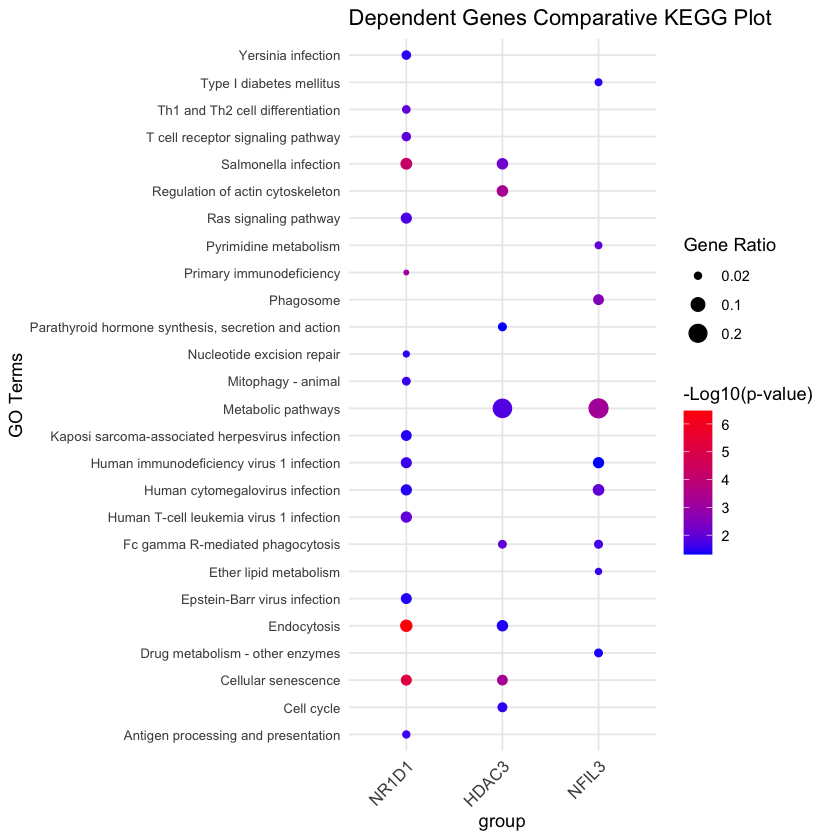

In [65]:
library(ggplot2)

ggplot(combined_KEGG, aes(x = group, y = interaction(term_name), 
                          color = -log10(p_value), size = ratio)) +
  geom_point() +
  scale_color_gradient(low = "blue", high = "red") +
  scale_size(range = c(1, 5), 
             breaks = c(0.02, 0.1, 0.2),  # Customize these values based on your data
             labels = c("0.02", "0.1", "0.2")) +  # Fix typo in labels
  labs(y = "GO Terms", 
       color = "-Log10(p-value)", size = "Gene Ratio") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8),   # Adjust y-axis label size
        axis.text.x = element_text(size = 10, angle = 45, hjust = 1)) +  # Adjust x-axis label size and angle
  ggtitle("Dependent Genes Comparative KEGG Plot")

In [87]:
combined_TF <- combined[combined$source == 'TF',]

# Filter rows where term_id does not contain an underscore - remove redundant rows
combined_TF <- combined_TF %>% filter(!grepl("_", term_id))
combined_TF$term_name_short <- sub("Factor: ","",combined_TF$term_name)

combined_TF_top10 <- rbind(combined_TF[combined_TF$group == 'NR1D1',] %>% head(10),
                           combined_TF[combined_TF$group == 'HDAC3',] %>% head(10),
                           combined_TF[combined_TF$group == 'NFIL3',] %>% head(10)
                           )

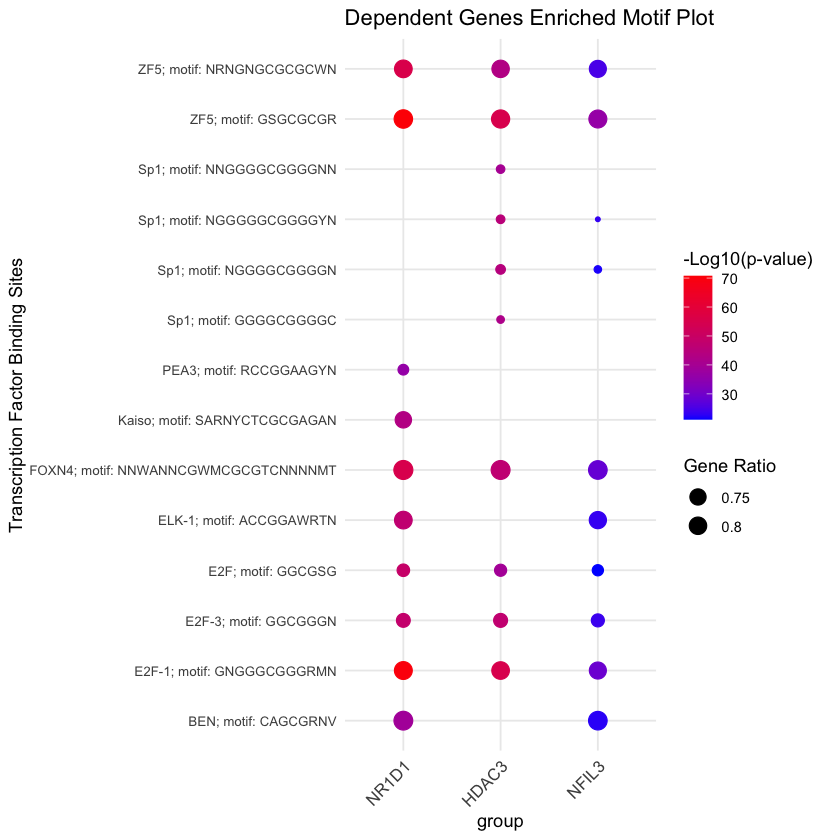

In [89]:
ggplot(combined_TF_top10, aes(x = group, y = interaction(term_name_short), 
                          color = -log10(p_value), size = ratio)) +
  geom_point() +
  scale_color_gradient(low = "blue", high = "red") +
  scale_size(range = c(1, 5), 
             breaks = c(0.5, 0.75, 0.8),  # Customize these values based on your data
             labels = c("0.5", "0.75", "0.8")) +  # Fix typo in labels
  labs(y = "Transcription Factor Binding Sites", 
       color = "-Log10(p-value)", size = "Gene Ratio") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8),   # Adjust y-axis label size
        axis.text.x = element_text(size = 10, angle = 45, hjust = 1)) +  # Adjust x-axis label size and angle
  ggtitle("Dependent Genes Enriched Motif Plot")

# run same analysis on unique genes

In [91]:
hdac3 <- run_gprofiler('hdac3_uniq_ID.txt')
nr1d1 <- run_gprofiler('nr1d1_uniq_ID.txt')
nfil3 <- run_gprofiler('nfil3_uniq_ID.txt')

nr1d1$result$group <- 'NR1D1'
hdac3$result$group <- 'HDAC3'
nfil3$result$group <- 'NFIL3'

combined_uniq <- rbind(nr1d1$result, hdac3$result, nfil3$result)
combined_uniq$group <- factor(combined_uniq$group, levels = c('NR1D1', 'HDAC3', 'NFIL3'))

In [92]:
combined_KEGG = combined_uniq[combined_uniq$source == 'KEGG',]

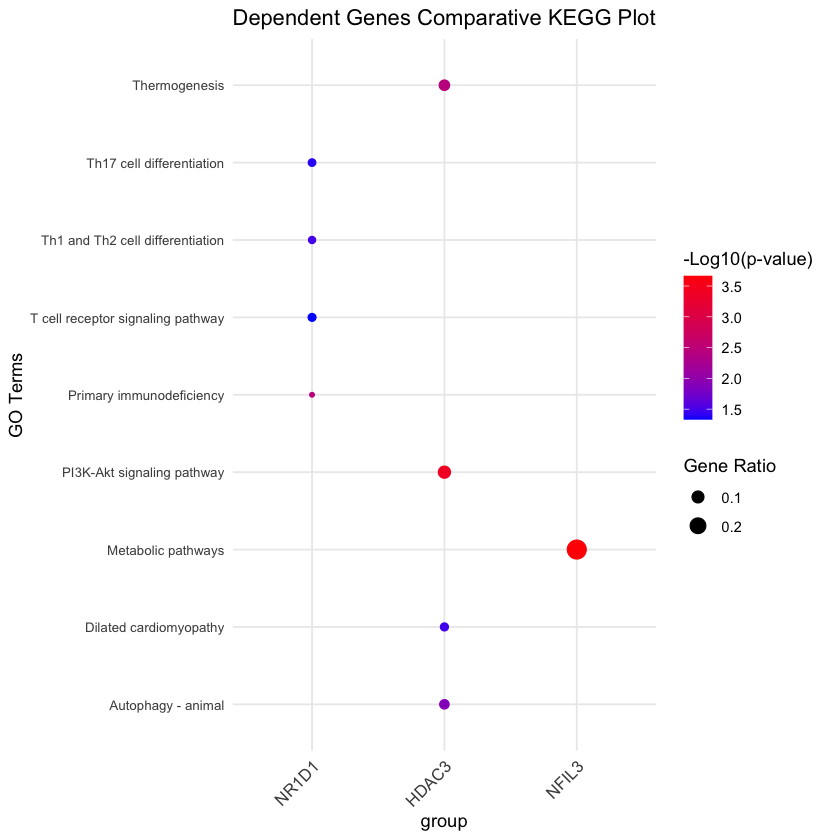

In [93]:
library(ggplot2)

ggplot(combined_KEGG, aes(x = group, y = interaction(term_name), 
                          color = -log10(p_value), size = ratio)) +
  geom_point() +
  scale_color_gradient(low = "blue", high = "red") +
  scale_size(range = c(1, 5), 
             breaks = c(0.02, 0.1, 0.2),  # Customize these values based on your data
             labels = c("0.02", "0.1", "0.2")) +  # Fix typo in labels
  labs(y = "GO Terms", 
       color = "-Log10(p-value)", size = "Gene Ratio") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8),   # Adjust y-axis label size
        axis.text.x = element_text(size = 10, angle = 45, hjust = 1)) +  # Adjust x-axis label size and angle
  ggtitle("Unique Genes Comparative KEGG Plot")

In [96]:
combined_TF

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents,highlighted,ratio,group,term_name_short
<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<lgl>,<dbl>,<fct>,<chr>
query_1,TRUE,5.051889e-28,14398,670,576,0.8597015,0.04000556,TF:M00333,TF,Factor: ZF5; motif: NRNGNGCGCGCWN,21629,3922,TF:M00000,FALSE,0.8597015,NR1D1,ZF5; motif: NRNGNGCGCGCWN
query_1,TRUE,6.155264e-27,14823,670,584,0.8716418,0.03939823,TF:M00716,TF,Factor: ZF5; motif: GSGCGCGR,21629,3920,TF:M00000,FALSE,0.8716418,NR1D1,ZF5; motif: GSGCGCGR
query_1,TRUE,7.267789e-25,15957,670,606,0.9044776,0.03797706,TF:M04662,TF,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT,21629,1174,TF:M00000,FALSE,0.9044776,NR1D1,FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT
query_1,TRUE,1.707328e-24,14210,670,564,0.8417910,0.03969036,TF:M10209,TF,Factor: E2F-1; motif: GNGGGCGGGRMN,21629,742,TF:M00000,FALSE,0.8417910,NR1D1,E2F-1; motif: GNGGGCGGGRMN
query_1,TRUE,9.710312e-23,13469,670,541,0.8074627,0.04016631,TF:M10276,TF,Factor: Kaiso; motif: SARNYCTCGCGAGAN,21629,3886,TF:M00000,FALSE,0.8074627,NR1D1,Kaiso; motif: SARNYCTCGCGAGAN
query_1,TRUE,3.917252e-20,10412,670,448,0.6686567,0.04302728,TF:M00803,TF,Factor: E2F; motif: GGCGSG,21629,788,TF:M00000,FALSE,0.6686567,NR1D1,E2F; motif: GGCGSG
query_1,TRUE,1.127826e-18,16194,670,599,0.8940299,0.03698901,TF:M01240,TF,Factor: BEN; motif: CAGCGRNV,21629,284,TF:M00000,FALSE,0.8940299,NR1D1,BEN; motif: CAGCGRNV
query_1,TRUE,1.771061e-14,11263,670,456,0.6805970,0.04048655,TF:M02089,TF,Factor: E2F-3; motif: GGCGGGN,21629,766,TF:M00000,FALSE,0.6805970,NR1D1,E2F-3; motif: GGCGGGN
query_1,TRUE,1.603327e-13,7897,670,348,0.5194030,0.04406737,TF:M00428,TF,Factor: E2F-1; motif: NKTSSCGC,21629,744,TF:M00000,FALSE,0.5194030,NR1D1,E2F-1; motif: NKTSSCGC


In [94]:
combined_TF <- combined_uniq[combined_uniq$source == 'TF',]

# Filter rows where term_id does not contain an underscore - remove redundant rows
combined_TF <- combined_TF %>% filter(!grepl("_", term_id))
combined_TF$term_name_short <- sub("Factor: ","",combined_TF$term_name)

combined_TF_top10 <- rbind(combined_TF[combined_TF$group == 'NR1D1',] %>% head(10),
                           combined_TF[combined_TF$group == 'HDAC3',] %>% head(10),
                           combined_TF[combined_TF$group == 'NFIL3',] %>% head(10)
                           )

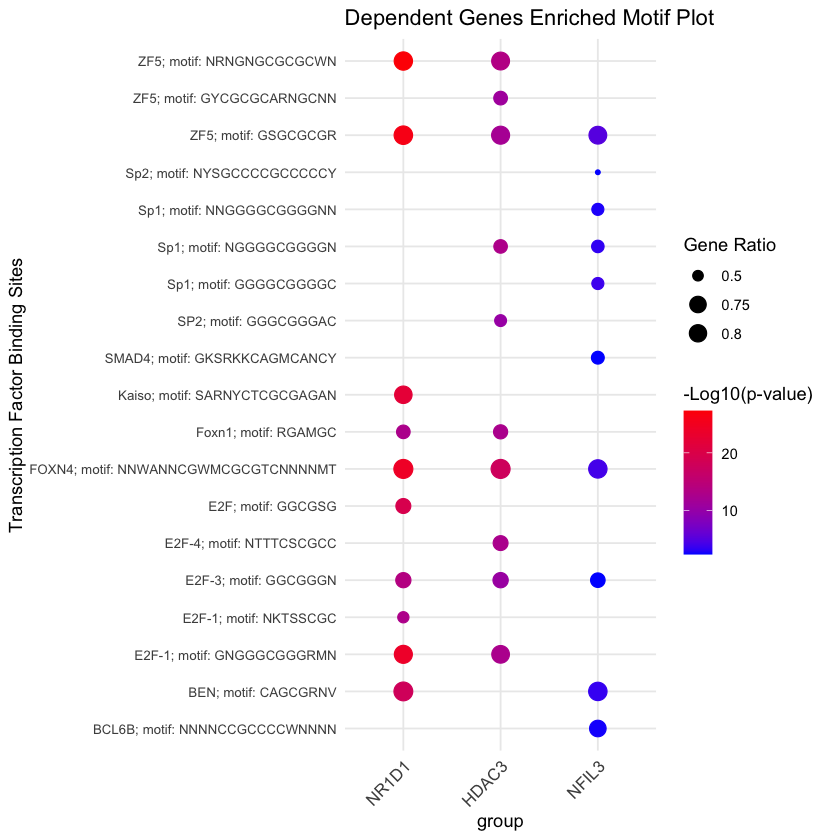

In [95]:
ggplot(combined_TF_top10, aes(x = group, y = interaction(term_name_short), 
                          color = -log10(p_value), size = ratio)) +
  geom_point() +
  scale_color_gradient(low = "blue", high = "red") +
  scale_size(range = c(1, 5), 
             breaks = c(0.5, 0.75, 0.8),  # Customize these values based on your data
             labels = c("0.5", "0.75", "0.8")) +  # Fix typo in labels
  labs(y = "Transcription Factor Binding Sites", 
       color = "-Log10(p-value)", size = "Gene Ratio") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8),   # Adjust y-axis label size
        axis.text.x = element_text(size = 10, angle = 45, hjust = 1)) +  # Adjust x-axis label size and angle
  ggtitle("Unique Genes Enriched Motif Plot")